Netflix Shows and Movies - Exploratory Analysis

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Load Netflix dataset

In [7]:
path = "C:/AI-ML/AI_MI_Career/datasets/netflix_titles_nov_2019.csv"
netflix = pd.read_csv(path)
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


1. Basic Data Understanding
- How many total records are there?
- What are the data types of each column?
- Are there any missing/null values?
- Count of unique values per column.

In [14]:
#How many total records are there?
total_records = netflix.shape[0]
print(f"Total records: {total_records}")
#What are the data types of each column?
data_types = netflix.dtypes
print("Data types of each column:")
print(data_types)

Total records: 5837
Data types of each column:
show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object


In [15]:
#Are there any missing/null values?
missing_values = netflix.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


In [ ]:
#Count of unique values per column.
unique_counts = netflix.nunique()
print("Count of unique values per column:")
print(unique_counts)

Count of unique values per column:
show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64


TASK 2: 
- How many unique titles, directors, and countries are there?
- Identify any columns with missing values and their percentages.
- Count how many entries fall under each type: Movie or TV Show.

In [28]:
#How many unique titles, directors, and countries are there?
unique_counts = netflix[['title', 'director', 'country']].nunique()
print("Unique counts for titles, directors, and countries:")
print(unique_counts)


Unique counts for titles, directors, and countries:
title       5780
director    3108
country      527
dtype: int64


In [30]:
#Identify any columns with missing values and their percentages.
missing_percentage = netflix.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
show_id          0.000000
title            0.000000
director        32.568100
cast             9.525441
country          7.315402
date_added      10.998801
release_year     0.000000
rating           0.171321
duration         0.000000
listed_in        0.000000
description      0.000000
type             0.000000
dtype: float64


type
Movie      3939
TV Show    1898
Name: count, dtype: int64


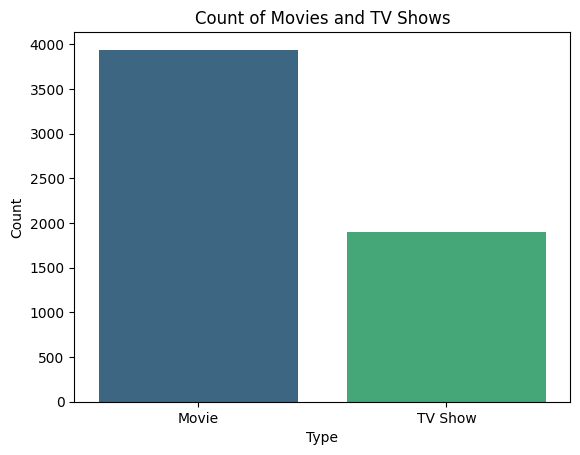

In [ ]:
#Show the distribution of content by type (Movie vs TV Show).
print(netflix['type'].value_counts())
sns.countplot(data=netflix, x='type', order=netflix['type'].value_counts().index, 
    palette='viridis',legend=False)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


TASK 3 : Content Distribution
- Find the top 5 most common genres (listed_in) across all content.
- What are the top 10 countries with the most content on Netflix?

Top 5 most common genres:
listed_in
International Movies      1797
Dramas                    1488
Comedies                   992
International TV Shows     966
Documentaries              658
TV Dramas                  574
Action & Adventure         532
Independent Movies         516
TV Comedies                425
Crime TV Shows             355
Name: count, dtype: int64


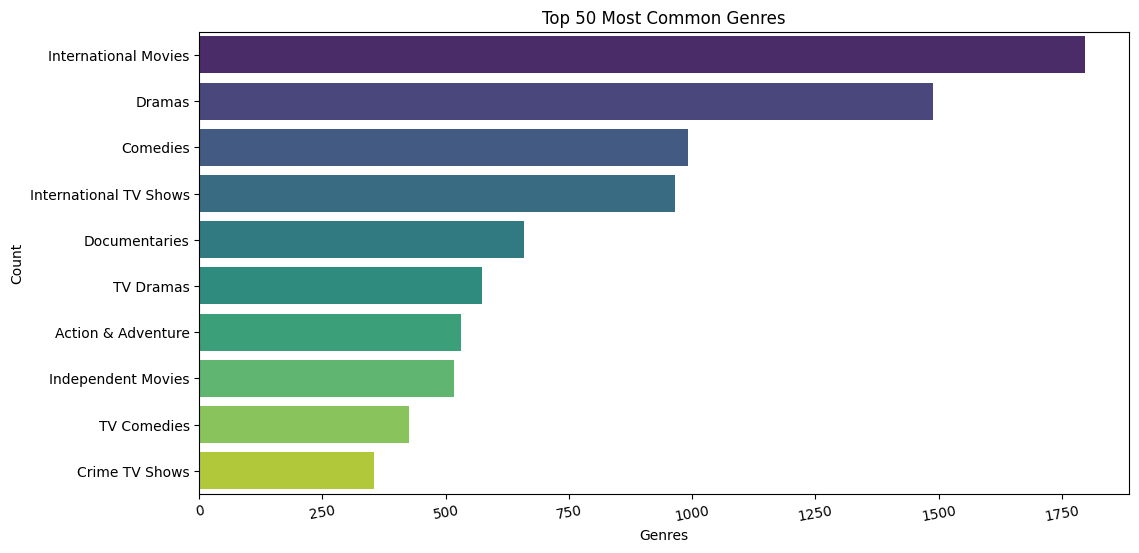

In [ ]:
#Find the top 5 most common genres (listed_in) across all content.
top_genres = netflix['listed_in'].str.split(', ').explode().value_counts().head(10)
print("Top 5 most common genres:") 
print(top_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


In [51]:
netflix.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [ ]:
countries_genres = netflix.groupby('country')['listed_in'].apply(lambda x: ', '.join(x)).reset_index()
countries_genres['listed_in'] = countries_genres['listed_in'].str.split(', ')
countries_genres = countries_genres.explode('listed_in')
top_countries_genres = countries_genres['country'].value_counts().head(10)
print("Top 10 countries with the most content on Netflix:")
print(top_countries_genres)

     country                  listed_in
0  Argentina     International TV Shows
0  Argentina                 Reality TV
0  Argentina  Spanish-Language TV Shows
0  Argentina   Children & Family Movies
0  Argentina           Music & Musicals
Top 10 countries with the most content on Netflix:
country
United States     3358
India             1884
United Kingdom     774
Japan              406
South Korea        380
Spain              297
Canada             269
Turkey             206
France             203
Taiwan             197
Name: count, dtype: int64
